In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Générer des données aléatoires pour l'exemple
# des données de régression avec 100 échantillons, 1 caractéristique, un bruit de 10, et une graine aléatoire de 42. X contient les caractéristiques, et Y contient les étiquettes cibles
X, Y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
print("les caractéristiques X :",X)
print("les étiquettes cibles Y :",Y)



les caractéristiques X : [[ 0.93128012]
 [ 0.08704707]
 [-1.05771093]
 [ 0.31424733]
 [-0.47917424]
 [ 0.64768854]
 [-0.46341769]
 [ 0.54256004]
 [ 0.61167629]
 [ 1.0035329 ]
 [ 0.8219025 ]
 [ 1.53803657]
 [ 0.73846658]
 [-0.21967189]
 [-0.8084936 ]
 [ 0.09176078]
 [-1.95967012]
 [ 0.51326743]
 [ 1.03099952]
 [-2.6197451 ]
 [ 0.49671415]
 [ 0.09707755]
 [-0.46572975]
 [ 0.91540212]
 [ 1.56464366]
 [ 1.46564877]
 [-0.60063869]
 [-0.03582604]
 [-0.60170661]
 [-1.19620662]
 [ 0.35711257]
 [ 0.37569802]
 [ 0.26105527]
 [-0.5297602 ]
 [-0.90802408]
 [ 0.19686124]
 [-0.29900735]
 [ 0.36163603]
 [ 0.82254491]
 [-0.29169375]
 [ 0.36139561]
 [-0.676922  ]
 [ 1.52302986]
 [-0.51827022]
 [-0.23415337]
 [-0.39210815]
 [-0.3011037 ]
 [-0.64511975]
 [ 0.32875111]
 [ 0.2088636 ]
 [-0.32766215]
 [ 0.00511346]
 [-0.23413696]
 [ 1.47789404]
 [-0.38508228]
 [ 0.34361829]
 [ 0.33126343]
 [-0.18565898]
 [-0.23458713]
 [-1.98756891]
 [ 0.32408397]
 [-0.2257763 ]
 [-1.10633497]
 [-0.70205309]
 [-1.46351495]


In [9]:
# Ajouter une colonne de biais (constante) à la matrice des caractéristiques X
X_biais = np.c_[np.ones((X.shape[0], 1)), X]

# divise les données en ensembles d'entraînement et de test (80% d'entraînement et 20% de test) en utilisant la fonction train_test_split de scikit-learn
X_train, X_test, Y_train, Y_test = train_test_split(X_biais, Y, test_size=0.2, random_state=42)

# Initialiser les paramètres θ de manière aléatoire
theta = np.random.rand(X_biais.shape[1])

# Définir le nombre d'itérations et le taux d'apprentissage
epochs = 1000
learning_rate = 0.01



In [10]:
# implémentent la descente de gradient pour ajuster les paramètres theta du modèle en minimisant l'erreur quadratique.
for epoch in range(epochs):
    # Calculer la prédiction
    predictions = np.dot(X_train, theta)

    # Calculer l'erreur
    errors = predictions - Y_train

    # Calculer le gradient
    gradient = (1/len(X_train)) * np.dot(X_train.T, errors)

    # Mettre à jour les paramètres θ
    theta = theta - learning_rate * gradient

# utilisent les paramètres appris pour faire des prédictions sur l'ensemble de test et calculer l'erreur quadratique moyenne (mse_test).
predictions_test = np.dot(X_test, theta)

# Calculer l'erreur sur l'ensemble de test
mse_test = np.mean((predictions_test - Y_test)**2)

print("Paramètres finaux θ :", theta)
print("Erreur quadratique moyenne sur l'ensemble de test :", mse_test)

Paramètres finaux θ : [ 0.09101029 44.22818527]
Erreur quadratique moyenne sur l'ensemble de test : 104.29621565428735


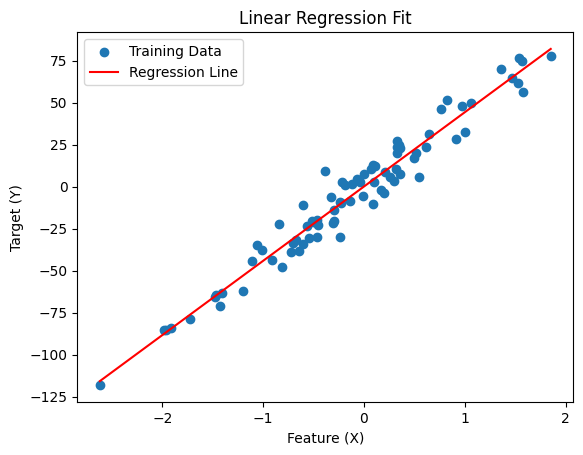

In [11]:
# Scatter plot for training data
plt.scatter(X_train[:, 1], Y_train, label='Training Data')

# Plotting the regression line
x_line = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100)
y_line = theta[0] + theta[1] * x_line
plt.plot(x_line, y_line, color='red', label='Regression Line')

# Set labels and title
plt.xlabel('Feature (X)')
plt.ylabel('Target (Y)')
plt.title('Linear Regression Fit')

# Show legend
plt.legend()

# Display the plot
plt.show()


In [20]:
# Import des bibliothèques nécessaires
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
# Partie 1 : Charger les données Iris
iris = datasets.load_iris()
print(iris)
X = iris.data
y = iris.target



{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [21]:
# Partie 2 : Afficher les différents attributs
print("Attributs Iris :")
print(iris.feature_names)




Attributs Iris :
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [22]:
# Partie 3 : Diviser les données en jeu d'entrainement et jeu de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [23]:
# Partie 4 : Entraîner le modèle en utilisant une SVM linéaire avec C=0.05 et gamma='auto'
svm_model = SVC(C=0.05, kernel='linear', gamma='auto')
svm_model.fit(X_train, y_train)



SVC(C=0.05, gamma='auto', kernel='linear')

In [24]:
# Partie 5 : Prédire le jeu de données test
y_pred = svm_model.predict(X_test)



In [25]:
# Partie 6 : Afficher la matrice de confusion et le taux de précision
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("\nMatrice de confusion :")
print(conf_matrix)
print("\nTaux de précision : {:.2f}%".format(accuracy * 100))




Matrice de confusion :
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Taux de précision : 100.00%


In [26]:
# Partie 7 : Utiliser GridSearchCV pour trouver les meilleures valeurs de C et gamma
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Afficher les meilleures valeurs de C et gamma
print("\nMeilleures valeurs de C et gamma:")
print(grid_search.best_params_)

# Utiliser le modèle avec les meilleurs paramètres pour prédire le jeu de données test
best_svm_model = grid_search.best_estimator_
y_pred_best = best_svm_model.predict(X_test)

# Afficher la matrice de confusion et le taux de précision avec les meilleurs paramètres
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
accuracy_best = accuracy_score(y_test, y_pred_best)

print("\nMatrice de confusion avec meilleurs paramètres:")
print(conf_matrix_best)
print("\nTaux de précision avec meilleurs paramètres : {:.2f}%".format(accuracy_best * 100))


Meilleures valeurs de C et gamma:
{'C': 1, 'gamma': 'scale'}

Matrice de confusion avec meilleurs paramètres:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Taux de précision avec meilleurs paramètres : 100.00%


In [19]:
from sklearn.metrics import f1_score

# Calculate the F1 score with the best model
f1_best = f1_score(y_test, y_pred_best, average='weighted')

print("\nF1 Score with best parameters: {:.2f}".format(f1_best))



F1 Score with best parameters: 1.00


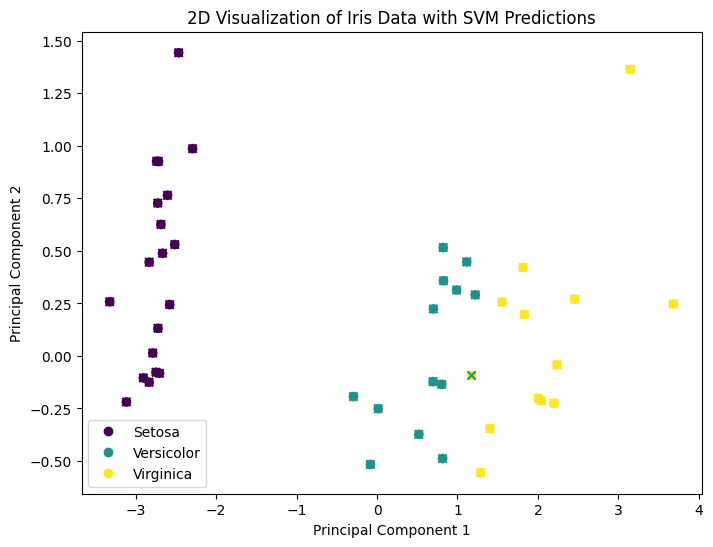

In [17]:
# Appliquer PCA pour réduire les données à 2 dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Entraîner le modèle en utilisant une SVM linéaire avec C=0.05 et gamma='auto'
svm_model = SVC(C=0.05, kernel='linear', gamma='auto')
svm_model.fit(X_train_pca, y_train)

# Prédire le jeu de données test
y_pred = svm_model.predict(X_test_pca)

# Visualiser les données en 2D avec les prédictions
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', label='True Labels')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, marker='x', cmap='viridis', label='Predicted Labels')
plt.legend(handles=scatter.legend_elements()[0], labels=['Setosa', 'Versicolor', 'Virginica'])
plt.title('2D Visualization of Iris Data with SVM Predictions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
from sklearn.svm import SVC

# Partie 2 - Solution 1 : SVM avec kernel RBF
svm_rbf_model = SVC(C=0.006, kernel='rbf', gamma='scale')
svm_rbf_model.fit(X_train, y_train)
y_pred_rbf = svm_rbf_model.predict(X_test)

print("\nSVM avec kernel RBF - Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_rbf))
print("Taux de précision : {:.2f}%".format(accuracy_score(y_test, y_pred_rbf) * 100))

# Partie 2 - Solution 2 : SVM avec kernel polynomial
svm_poly_model = SVC(C=1, kernel='poly', gamma='auto', degree=7)
svm_poly_model.fit(X_train, y_train)
y_pred_poly = svm_poly_model.predict(X_test)

print("\nSVM avec kernel polynomial - Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_poly))
print("Taux de précision : {:.2f}%".format(accuracy_score(y_test, y_pred_poly) * 100))



SVM avec kernel RBF - Matrice de confusion :
[[ 0 19  0]
 [ 0 12  1]
 [ 0  0 13]]
Taux de précision : 55.56%

SVM avec kernel polynomial - Matrice de confusion :
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Taux de précision : 97.78%


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# Charger le jeu de données breast_cancer
cancer_data = load_breast_cancer()
X_cancer = cancer_data.data
y_cancer = cancer_data.target

# Diviser les données en ensemble d'entraînement et ensemble de test
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.3, random_state=42)

# Créer et entraîner une SVM pour différencier les tumeurs malignes des tumeurs bénignes
svm_cancer_model = SVC(kernel='linear')
svm_cancer_model.fit(X_train_cancer, y_train_cancer)

# Prédire le jeu de données test
y_pred_cancer = svm_cancer_model.predict(X_test_cancer)

# Afficher la matrice de confusion et le taux de précision
conf_matrix_cancer = confusion_matrix(y_test_cancer, y_pred_cancer)
accuracy_cancer = accuracy_score(y_test_cancer, y_pred_cancer)

print("\nMatrice de confusion pour la détection de cancer:")
print(conf_matrix_cancer)
print("\nTaux de précision : {:.2f}%".format(accuracy_cancer * 100))



Matrice de confusion pour la détection de cancer:
[[ 59   4]
 [  2 106]]

Taux de précision : 96.49%
